In [2]:
import numpy as np
from scipy.stats import kendalltau
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()


In [5]:
with open("results/results_per_user.json", "r") as file:
    stats = json.load(file)
with open("user_study_data/setup_per_user.json", "r") as file:
    setup_per_user = json.load(file)

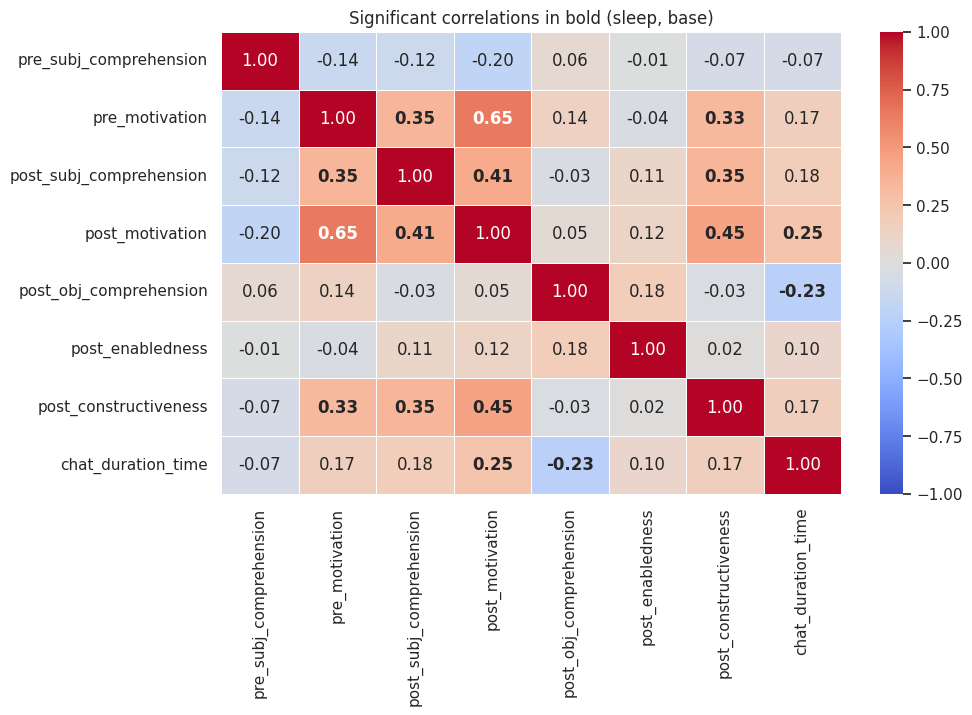

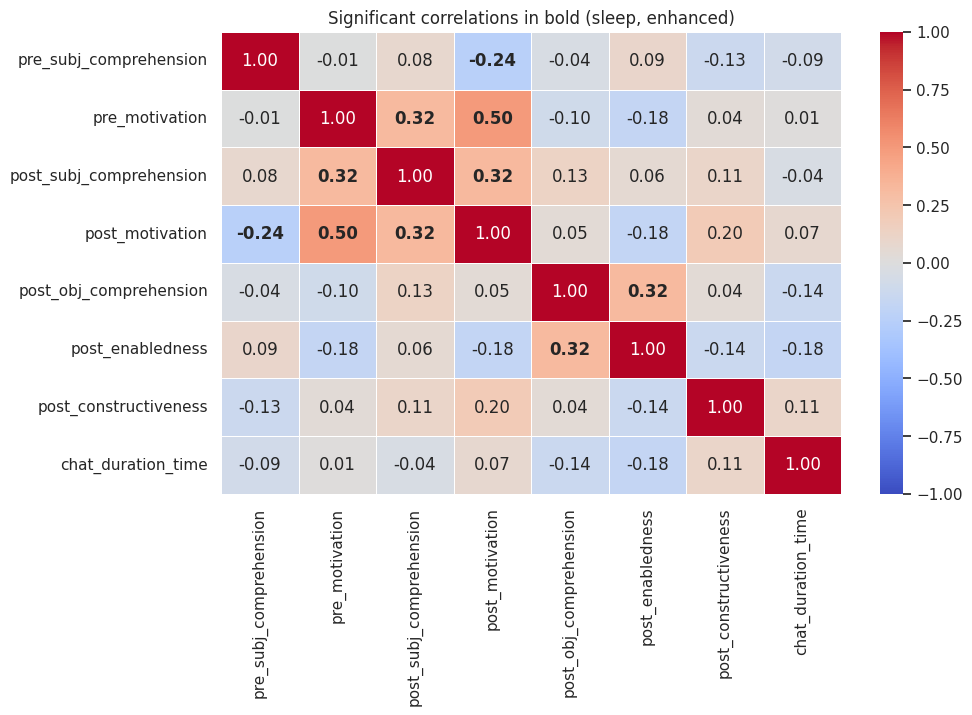

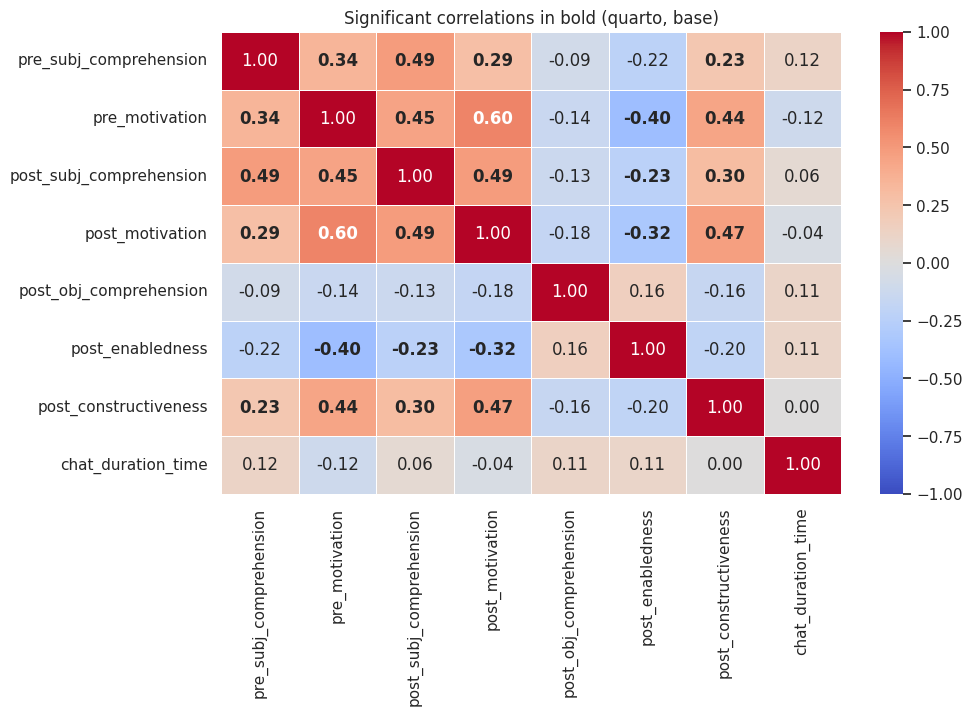

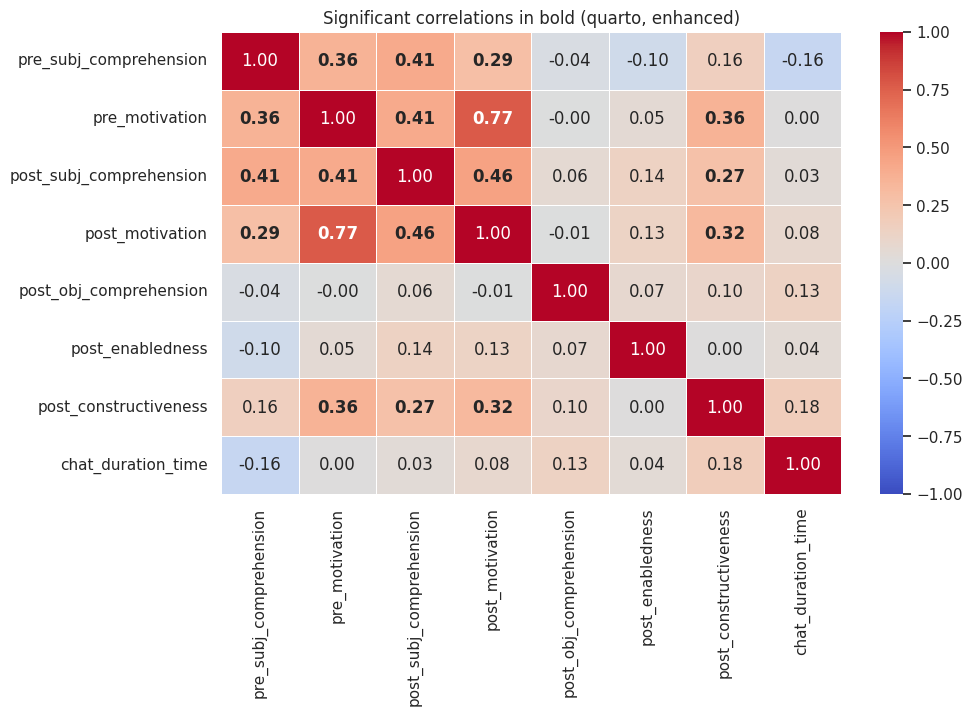

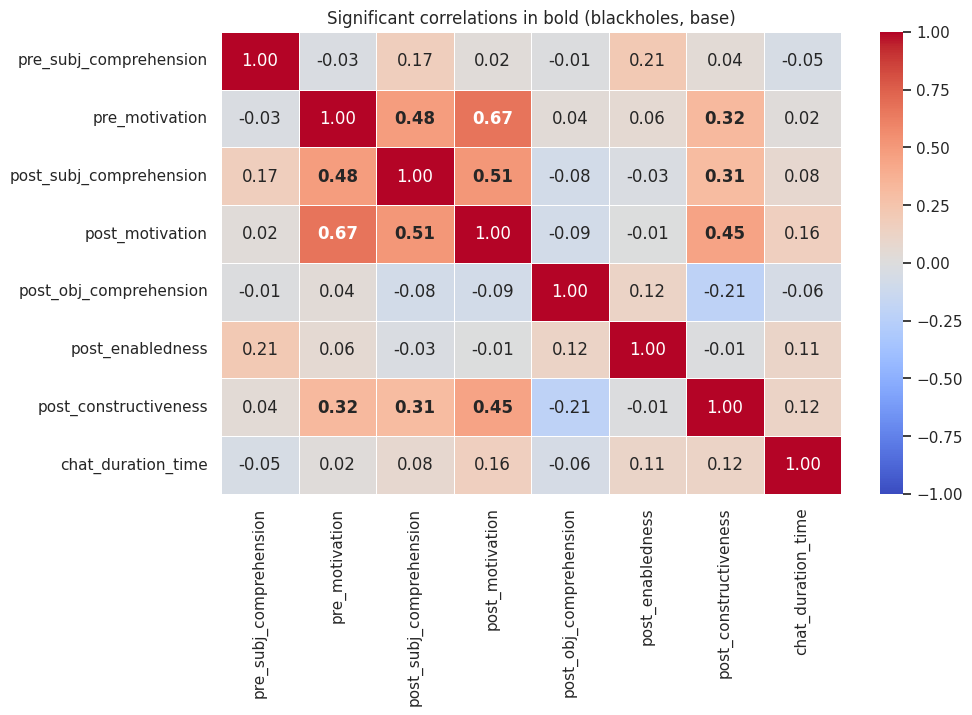

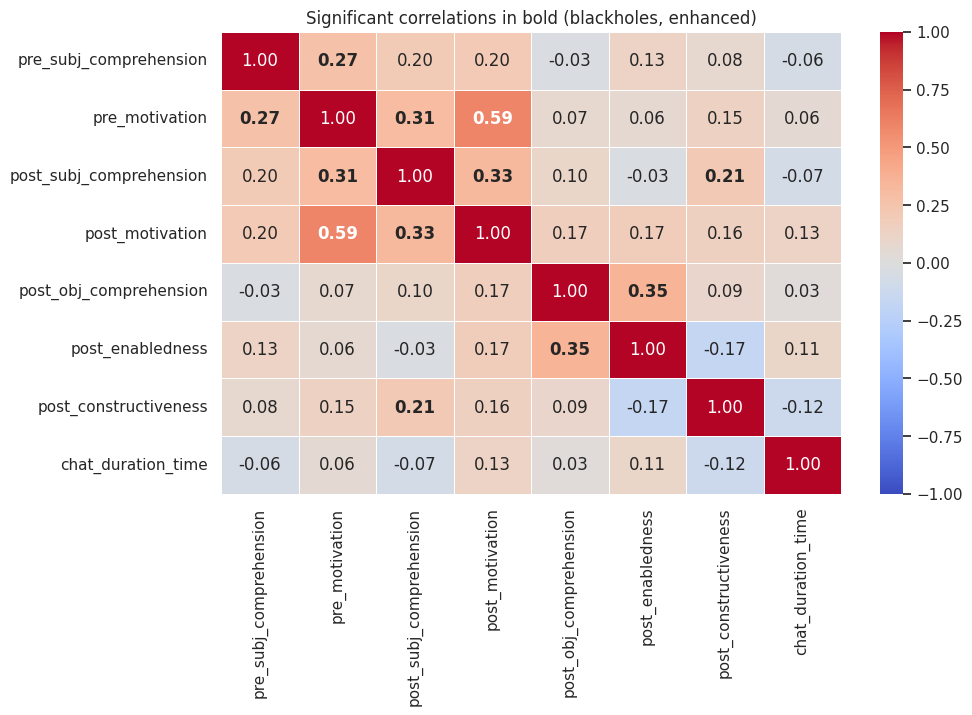

In [ ]:
# Calculate correlation
# 1 → strong positive correlation.
# -1 → strong negative correlation.
# 0 → no correlation.

SIGNIFICANCE_LEVEL = 0.05  # Set threshold for statistical significance

metrics = [
    "pre_subj_comprehension", "pre_motivation",
    "post_subj_comprehension", "post_motivation",
    "post_obj_comprehension", "post_enabledness", "post_constructiveness", "chat_duration_time", 
]


for topic in ["sleep", "quarto", "blackholes"]:
    for setting in ["base", "enhanced"]:
        data_list = []
        for user_id in stats:
            if topic == setup_per_user[user_id]["topic"] and setting == setup_per_user[user_id]["setting"]:
                data = np.column_stack([stats[user_id][metric] for metric in metrics])
                df_temp = pd.DataFrame(data, columns=metrics)
                data_list.append(df_temp)
        
        # Create DataFrame
        df = pd.DataFrame(np.array(data_list).squeeze(), columns=metrics)

        # Compute Kendall correlation matrix
        corr_matrix = df.corr(method="kendall")

        # Compute p-values
        p_values = np.zeros(corr_matrix.shape)
        cols = df.columns

        for i in range(len(cols)):
            for j in range(len(cols)):
                if i != j:
                    tau, p_value = kendalltau(df[cols[i]], df[cols[j]])
                    p_values[i, j] = p_value
                else:
                    p_values[i, j] = np.nan  # No self-correlation p-value

        p_values_df = pd.DataFrame(p_values, columns=cols, index=cols)

        # Plot only significant correlations
        plt.figure(figsize=(10,6))
        ax = sns.heatmap(
            corr_matrix,  # Show full correlation matrix
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            cmap="coolwarm",
            vmin=-1, vmax=1
        )

        # Bold only significant correlations
        for text, (i, j) in zip(ax.texts, [(row, col) for row in range(len(cols)) for col in range(len(cols))]):
            if i != j and p_values_df.iloc[i, j] < SIGNIFICANCE_LEVEL:
                text.set_weight("bold")

        plt.title(f"Significant correlations in bold ({topic}, {setting})")
        plt.show()

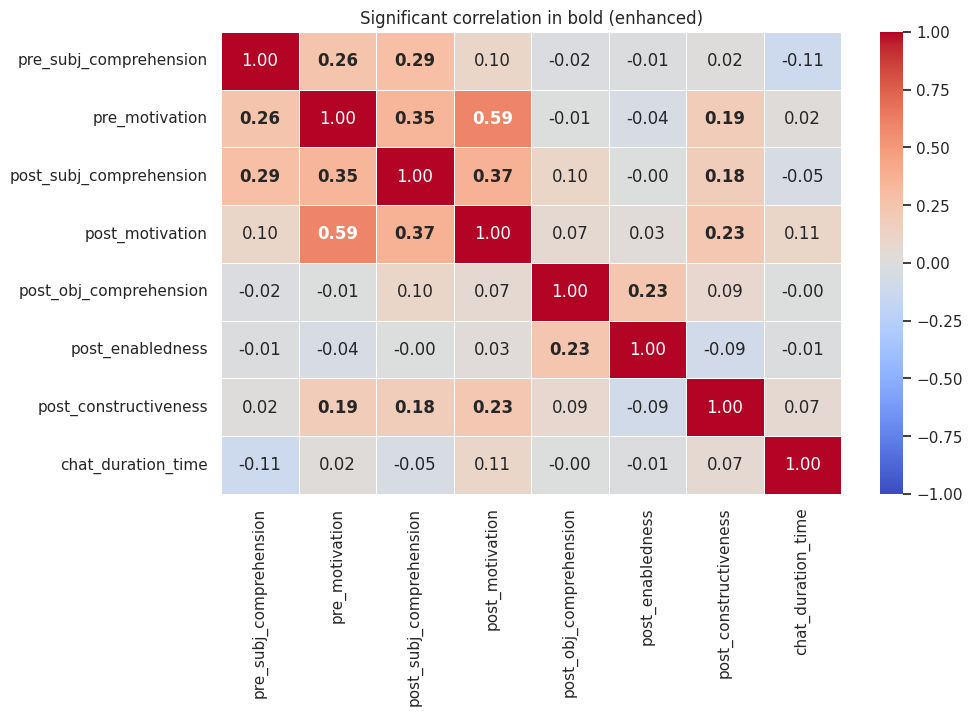

In [ ]:
# Calculate correlation
# 1 → strong positive correlation.
# -1 → strong negative correlation.
# 0 → no correlation.

SIGNIFICANCE_LEVEL = 0.05  # Set threshold for statistical significance

metrics = [
    "pre_subj_comprehension", "pre_motivation",
    "post_subj_comprehension", "post_motivation",
    "post_obj_comprehension", "post_enabledness", "post_constructiveness", "chat_duration_time"
]

setting = "enhanced"

data_list = []
for user_id in stats:
    if setting == setup_per_user[user_id]["setting"]:
        data = np.column_stack([stats[user_id][metric] for metric in metrics])
        df_temp = pd.DataFrame(data, columns=metrics)
        data_list.append(df_temp)
        
# Create DataFrame
df = pd.DataFrame(np.array(data_list).squeeze(), columns=metrics)

# Compute Kendall correlation matrix
corr_matrix = df.corr(method="kendall")

# Compute p-values
p_values = np.zeros(corr_matrix.shape)
cols = df.columns

for i in range(len(cols)):
    for j in range(len(cols)):
        if i != j:
            tau, p_value = kendalltau(df[cols[i]], df[cols[j]])
            p_values[i, j] = p_value
        else:
            p_values[i, j] = np.nan  # No self-correlation p-value

p_values_df = pd.DataFrame(p_values, columns=cols, index=cols)

# Plot only significant correlations
plt.figure(figsize=(10,6))
ax = sns.heatmap(
    corr_matrix,  # Show full correlation matrix
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cmap="coolwarm",
    vmin=-1, vmax=1
)

# Bold only significant correlations
for text, (i, j) in zip(ax.texts, [(row, col) for row in range(len(cols)) for col in range(len(cols))]):
    if i != j and p_values_df.iloc[i, j] < SIGNIFICANCE_LEVEL:
        text.set_weight("bold")

plt.title(f"Significant correlation in bold ({setting})")
plt.show()